# COMPSCI 589 HW1

#### Name: Haochen Wang

### SECTION 0: Load Libraries

In [1]:
import sklearn.model_selection
from scipy import stats
import numpy as np
import csv
import math
import matplotlib.pyplot as plt
from operator import itemgetter
from collections import Counter

### SECTION 1: Evaluating KNN

In [2]:
#Load the Iris data file using python csv module

knn_file = open('iris.csv')
csvreader = csv.reader(knn_file)

knnd = []
for row in csvreader:
        knnd.append(row)

knndata = []
for row in knnd:
        c = []
        c.append(float(row[0]))
        c.append(float(row[1]))
        c.append(float(row[2]))
        c.append(float(row[3]))
        c.append(row[4])
        knndata.append(c)

# print(knndata)


In [3]:
# Implementing Helper functions

# Normalize module
def mini(col):
    min = col[0]
    for val in col:
        if val < min:
            min = val
    return min

def maxi(col):
    max = col[0]
    for val in col:
        if val > max:
            max = val
    return max

def normalizationall(col, max, min):
    newarr = []
    for val in col:
        newarr.append((val-min)/(max-min)) 
    return newarr

def normalization(col):
    min = mini(col)
    max = maxi(col)
    newarr = []
    for val in col:
        newarr.append((val-min)/(max-min)) 
    return newarr, min, max

def vote(arr):
    return max(set(arr), key=arr.count)

In [4]:
# Split the Training and Testing Data

def split(dat, ranumber):
    traknn, tesknn = sklearn.model_selection.train_test_split(dat, train_size=0.8, test_size=0.2, random_state=ranumber, shuffle=True)
    return traknn, tesknn

# trainknn, testknn = split(knndata, 589)

In [5]:
# Euclidean distance

def edistance(a, b):
    a = np.array(a)
    b = np.array(b)
    s = np.linalg.norm(a - b)
    return s

# print(edistance([1,1,1,4],[5,5,5,2]))


In [6]:
# KD-Tree

# I will do it later if I have enough time.

In [7]:
# KNN Helpers

# def seperate_d_c(data):
#     dat = []
#     cat = []
#     all = []
#     for row in data:
#         da = []
#         da.append(float(row[0]))
#         da.append(float(row[1]))
#         da.append(float(row[2]))
#         da.append(float(row[3]))
#         dat.append(da)
#         al = da.copy()
#         al.append(row[4])
#         all.append(al)
#         cat.append(row[4])
        
#     return dat, cat, all

# trainknndata, trainknncat, ktr = seperate_d_c(trainknn)
# testknndata, testknncat, kte = seperate_d_c(testknn)

def transpose(dat):
    a = []
    a.append([row[0] for row in dat])
    a.append([row[1] for row in dat])
    a.append([row[2] for row in dat])
    a.append([row[3] for row in dat])
    if len(dat[0]) > 4:
        a.append([row[4] for row in dat])
    return a

def normaltab(traindat, testdat):
    trainnom = []
    testnom = []
    i = 0
    for col in traindat:
        trarr = []
        tearr = []
        if i < 4:
            trarr, trmin, trmax = normalization(col)
            tearr = normalizationall(testdat[i], trmax, trmin)
            trainnom.append(trarr)
            testnom.append(tearr)
            i+=1
    if len(traindat) == 5:
        trainnom.append(traindat[4])
        testnom.append(testdat[4])
    return trainnom, testnom
    
def transback(dat):
    ret = []
    i = 0
    while i < len(dat[0]):
        row = []
        for col in dat:
            row.append(col[i])
        ret.append(row)
        i+=1
    return ret

def distarray(normpt, normeddat):
    pt1 = normpt[:-1]
    cat1 = normpt[-1]
    disarray = []
    for ins in normeddat:
        pt2 = ins[:-1]
        cat2 = ins[-1]
        dis = edistance(pt1, pt2)
        disarray.append([dis,cat2])
    return sorted(disarray, key=itemgetter(0))

def normflow(train, test):
    ttrainknn = transpose(train)
    ttestknn = transpose(test)
    normttrain, normttest = normaltab(ttrainknn,ttestknn)
    nrmtr, nrmte = transback(normttrain), transback(normttest)
    return nrmtr, nrmte

# we use normtr, normte.  stands for normal train & normal test.

In [8]:
#KNN

def knn(k, traindat, testdat):
    predict = []
    correct = [col[-1] for col in testdat]
    for datpt in testdat:
        distlist = distarray(datpt, traindat)
        catlist = [col[1] for col in distlist[:k]]
        predict.append(vote(catlist))

    return predict, correct

def knntrains(k, rand, dat):
    trainknn, testknn = split(dat, rand)
    normedtrain, normedtest =normflow(trainknn, testknn)
    predict, correct = knn(k, normedtrain, normedtest)
    return predict, correct

def knntraintrain(k, rand, dat):
    trainknn, testknn = split(dat, rand)
    normedtrain, normedtest =normflow(trainknn, testknn)
    predict, correct = knn(k, normedtrain, normedtrain)
    return predict, correct

def accuracy(pred, corr):
    i = 0
    blist = []
    while i < len(pred):
        blist.append(pred[i]==corr[i])
        i+=1
    return (Counter(blist)[True])/len(blist)

def kaccuracytest(k, r, data):
    p, c = knntrains(k, r, data)
    acc = accuracy(p, c)
    return acc

def kaccuracytrain(k, r, data):
    p, c = knntraintrain(k, r, data)
    acc = accuracy(p, c)
    return acc

# print(kaccuracytest(19, 589, knndata))
# print(kaccuracytrain(19, 589, knndata))

In [9]:
# The Statistical Process for the kNN
def statdatatest(data):
    k = 1
    result_list = []
    while k <= 51:
        random = 11589
        alist = []
        while random < 11689:
            alist.append(kaccuracytest(k, random, data))
            random += 5
        result_list.append(alist)
        k+=2
    
    return np.array(result_list)

def statdatatrain(data):
    k = 1
    result_list = []
    while k <= 51:
        random = 11589
        alist = []
        while random < 11689:
            alist.append(kaccuracytrain(k, random, data))
            random += 5
        result_list.append(alist)
        k+=2
    
    return np.array(result_list)

# narray = statdatatest(knndata)
# print(narray.std(axis=1))

In [10]:
k = np.arange(1,52,2)
narraytrain = statdatatrain(knndata)
narraytest = statdatatest(knndata)
acctrain = narraytrain.mean(axis=1)
# print(acctrain)
acctest = narraytest.mean(axis=1)
stdtrain = narraytrain.std(axis=1)
stdtest = narraytest.std(axis=1)
# print(stdtrain)

### Q1.1 (12 Points) 
##### In the first graph, you should show the value of k on the horizontal axis, and on the vertical axis, the average accuracy of models trained over the training set, given that particular value of k. Also show, for each point in the graph, the corresponding standard deviation; you should do this by adding error bars to each point. The graph should look like the one in Figure 2 (though the “shape” of the curve you obtain may be different, of course).

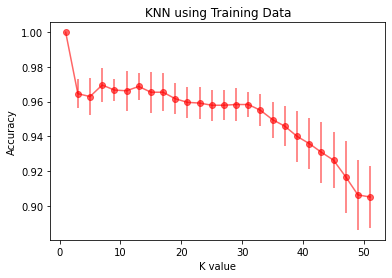

In [11]:
# Q1.1
# plt.scatter(k, acctrain)  
plt.errorbar(k, acctrain, yerr=stdtrain, fmt="-o", color = 'r', alpha = 0.6)
plt.title("KNN using Training Data")
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.show()

### Q1.2 (12 Points) 
##### In the second graph, you should show the value of k on the horizontal axis, and on the vertical axis, the average accuracy of models trained over the testing set, given that particular value of k. Also show, for each point in the graph, the corresponding standard deviation by adding error bars to the point.


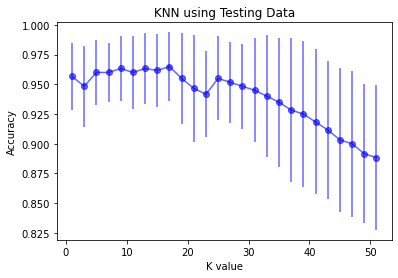

In [12]:
# Q1.2
# plt.scatter(k, acctest)
plt.errorbar(k, acctest, yerr=stdtest, fmt="-o", color = 'blue', alpha = 0.6)
plt.title("KNN using Testing Data")
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.show()

In [13]:
# print(acctrain,stdtrain)
# print(acctest,stdtest)
# ww = np.percentile(acctest, 25, interpolation = 'midpoint')
# print(ww)

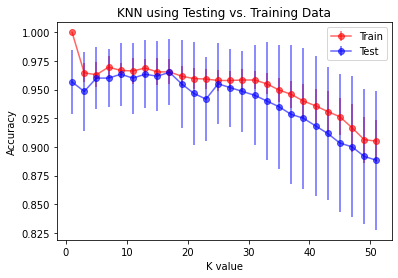

In [14]:
plt.errorbar(k, acctrain, yerr=stdtrain, fmt="-o", color = 'red', alpha = 0.6, label= "Train")
plt.errorbar(k, acctest, yerr=stdtest, fmt="-o", color = 'blue', alpha = 0.6, label= "Test")
plt.legend()
plt.title("KNN using Testing vs. Training Data")
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.show()

### Q1.3 (10 Points) 
##### Explain intuitively why each of these curves look the way they do. First, analyze the graph showing performance on the training set as a function of k. Why do you think the graph looks like that? Next, analyze the graph showing performance on the testing set as a function of k. Why do you think the graph looks like that?

Answer:

I. Analysis for performing under training set.

The graph looks this way because for a small number of K in the KNN, taken the extremes as K=1 for example, there's a perfect match with accuacy 1. 
For the training data, the performance accuracy was around 0.96-0.97 for around k < 30 except than 1. When k is larger than 30, the performance accuarcy start decreasing with a larger slope. This can be also described more clearly with a regression model with the accuracy.
My assumption is that the relation between Accuracy vs. K-Value is exponential declined. The larger k is, the faster the decline in accuarcy is. (d(accuarcy)/dk increases.)


II. Analysis for performing undering testing set. 

The graph, as we can easily find out, have the same trait as the train set, expect for k=1. I assume the graph (accuracy) would varied similarly as K change as train set data. However, we can see that the fluctuation for testing data is larger than training function, so I assume here it might be due to the testing data isn't on the training list and the randomness make them on the border (It's a farfetched & weird explanation).
But It

### Q1.4 (8 Points) 
##### We say that a model is underfitting when it performs poorly on the training data (and most likely on the testing data as well). We say that a model is overfitting when it performs well on training data but it does not generalize to new instances. Identify and report the ranges of values of k for which k-NN is underfitting, and ranges of values of k for which k-NN is overfitting.


Answer:

(1- Underfitting for Training) For underfitting, I think when for the traindata, as I stated above, that would be when K>30, when the slope start to decrease at an accelerating rate. This shows that the model is not generalized enough for new data. (also because the k value was relatively too big for the overall dataset 30/150 was around 1/5. If we have 1000 instances for the iris data, I believe k = 30 would be a perfect value for k.)

(2- Underfitting for Testing)  For k>30, the accuracy decreases faster and the error bar/ standard deviation is larger, hence show that the accuracy fluctuate a lot for k > 30, thus more evidence for underfitting.

(3- Overfitting for Training) As for the overfitting k of with training set, I think probably for k < 5, Consider a example of k < 1 or k < 2 (although k = 2 haven't been tested, but since we already for k = 2 we have 1 correct answer/category, so the accuracy would be significantly higher than k=2 with testing data.)

(4- Overfitting for Testing) Compare to the training data, we can clearly verify the result for Q1.4(3). For testing set, I don't think there's a lot overfitting, just around k < 5 for overfitting. For testing, because we don't have the testing data in the training model anymore, so when k is small there is a change the accuracy is not as high as the train data set.

### Q1.5 (8 Points) 
##### Based on the analyses made in the previous question, which value of k you would select if you were trying to fine-tune this algorithm so that it worked as well as possible in real life? Justify your answer.


Answer:

I would say I will record all categorization from k = 7 to 17, and then I will perform a statistic process on them and they can 'vote' the most likely category, and also would come up with a confidence interval to make the prediction more scientific and analysable.

More generally, in this case k = 7 to 17 out of 120 train data would be count of number of 5% to 15% of the number of instances in the training model. So k = 0.05~0.15*(# of training instance) would be a preferrable number, not considering the time comsumption. 

If for one k value, I'd prefer k = 12 or 13 here, as a mean for 7 and 17 above, neigher underfitting nor overfitting.